## Clustering

  - An unsupervised learning algorithm which segregates the data points into groups or clusters
  - Unsupervised learning - learning data which is not labelled (does not contain an output feature)
  - A pattern/behavior exhibited by data is identified by determining these clusters, and is used to identify the characteristics of any new data point
  - Clusters are formed such that the points within a cluster are similar to one another and are dissimilar to the points in the other cluster(s) 

### K-Means Clustering

  - This algorithm aims to split ***n*** data points into ***K*** clusters (basically, centroids) by minimizing the within cluster sum-of-squares (euclidean distance between the centroid and the corresponding data points of a cluster)
  - Condition: All the variables should be continuous

#### Importing the required packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

#### Reading the data and obtaining information on the data

In [2]:
trip = pd.read_excel('tripDetails.xlsx')
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TripID         91 non-null     int64
 1   TripLength     91 non-null     int64
 2   MaxSpeed       91 non-null     int64
 3   MostFreqSpeed  91 non-null     int64
 4   TripDuration   91 non-null     int64
 5   Brakes         91 non-null     int64
 6   IdlingTime     91 non-null     int64
 7   Honking        91 non-null     int64
dtypes: int64(8)
memory usage: 5.8 KB


In [3]:
trip.head()

,TripID,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
0,1,21,51,14,93,307,27,112
1,2,148,130,106,156,226,5,114
2,3,18,38,16,100,351,26,107
3,4,22,43,48,36,17,4,5
4,5,183,108,90,171,88,5,29


#### Dropping the column **TripID** and viewing summary statistics

In [4]:
trip.drop(labels = 'TripID', axis = 1, inplace = True)
trip.tail()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
86,21,42,13,92,360,24,98
87,183,126,89,149,189,5,130
88,22,44,12,72,349,24,93
89,163,135,91,129,202,5,144
90,20,64,42,27,36,5,20


In [5]:
trip.describe()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,70.769231,70.362637,50.648352,87.373626,135.439560,11.593407,49.923077
std,73.302126,34.509424,34.349632,47.123160,114.758607,9.796800,46.371023
min,16.000000,35.000000,12.000000,22.000000,14.000000,4.000000,4.000000
25%,20.000000,42.000000,15.500000,34.500000,36.500000,5.000000,20.000000
50%,21.000000,54.000000,42.000000,88.000000,100.000000,5.000000,25.000000
75%,163.000000,105.500000,89.000000,133.000000,198.000000,24.000000,97.500000
max,210.000000,138.000000,118.000000,171.000000,429.000000,32.000000,155.000000


#### Exploratory Data Analysis

In [6]:
units = ["km", *["km/h"] * 2, *("mins", "count") * 2]
print(units)

['km', 'km/h', 'km/h', 'mins', 'count', 'mins', 'count']


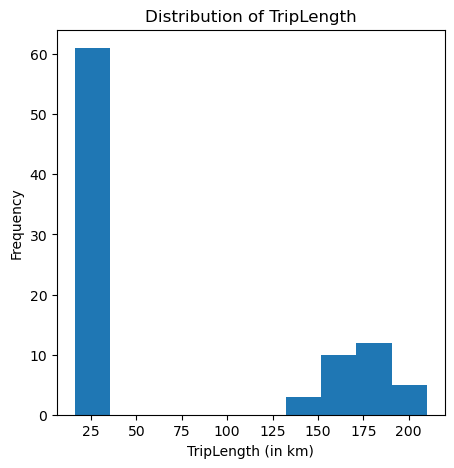

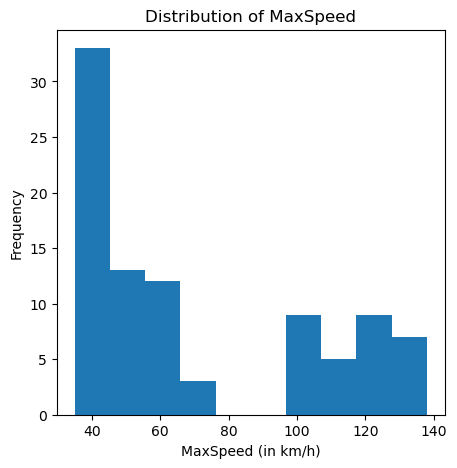

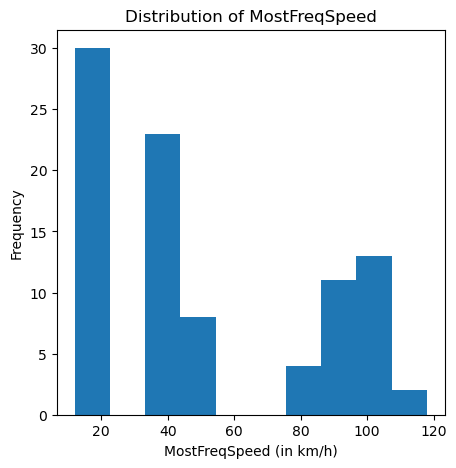

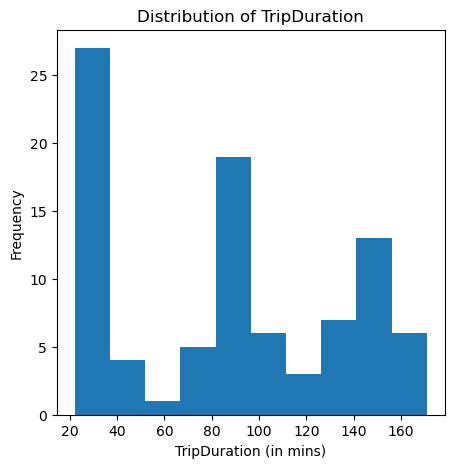

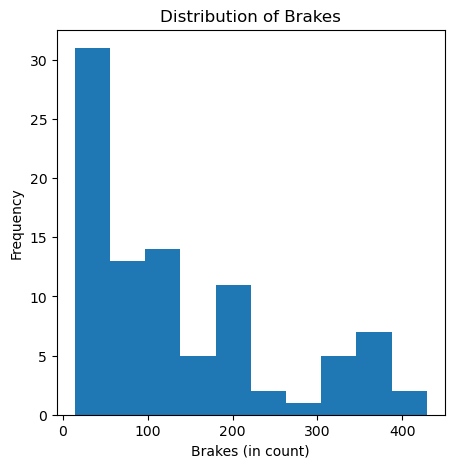

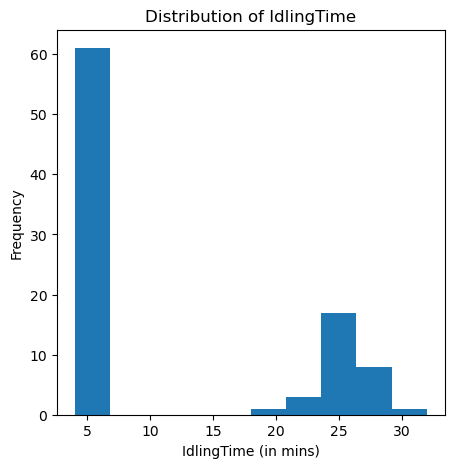

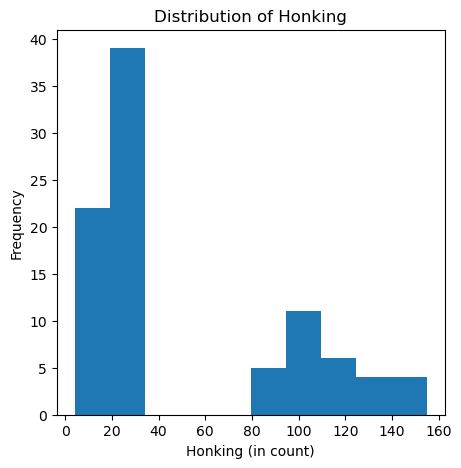

In [7]:
# plt.figure(figsize = (8,5))
for i in range(len(trip.columns)):
  trip[trip.columns[i]].plot(kind = "hist", bins = 10, figsize = (5,5))
  plt.xlabel(f"{trip.columns[i]} (in {units[i]})")
  plt.title(f"Distribution of {trip.columns[i]}")
  plt.show()

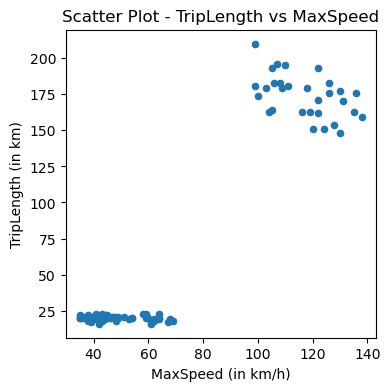

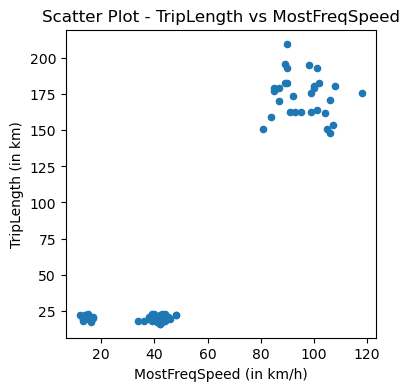

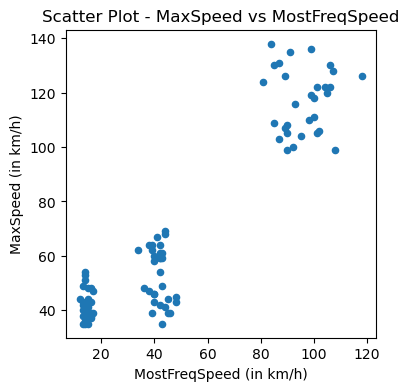

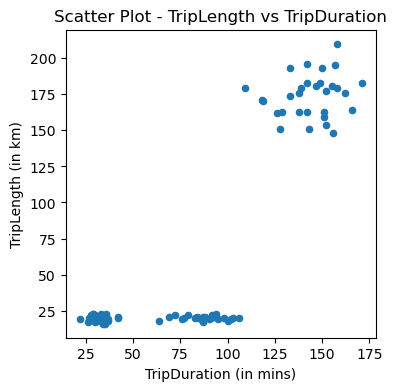

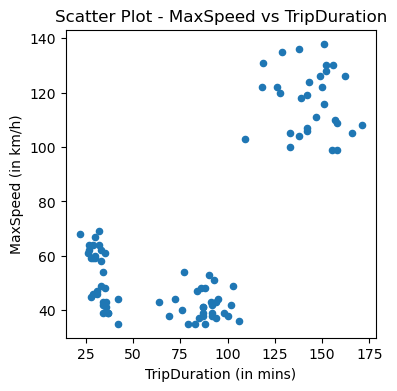

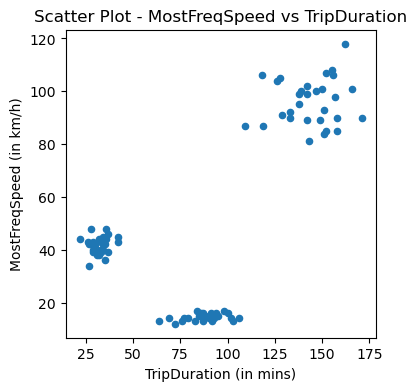

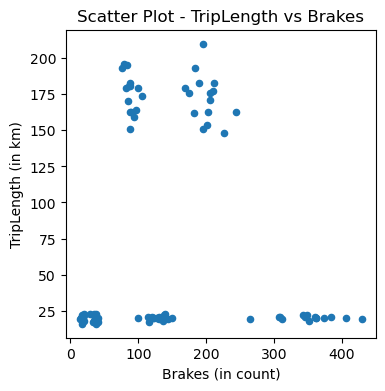

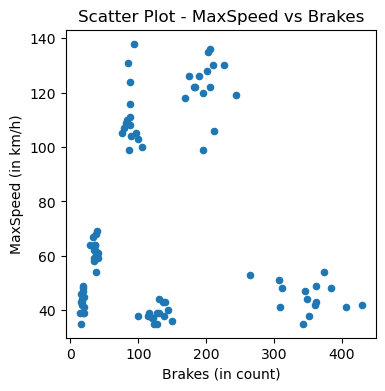

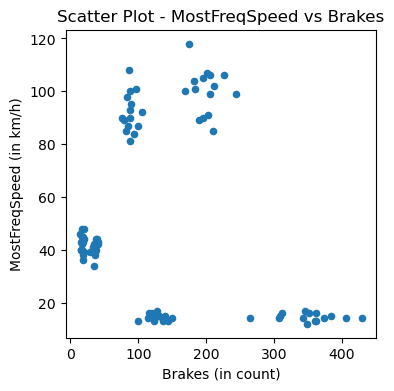

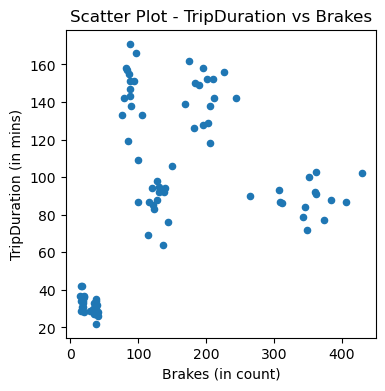

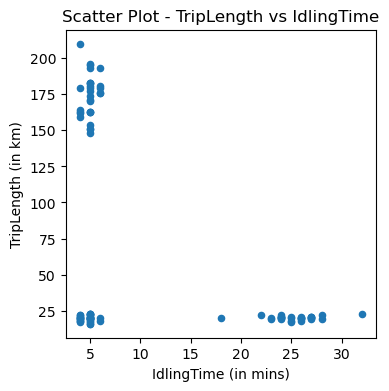

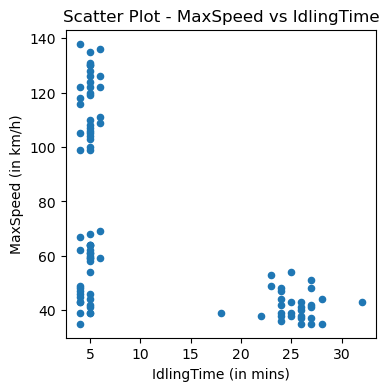

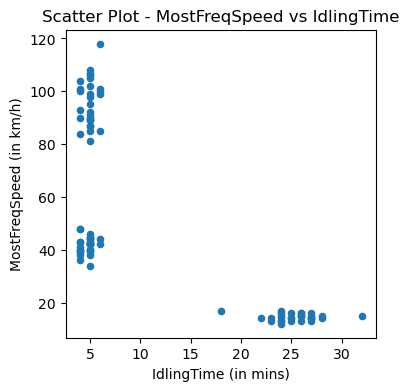

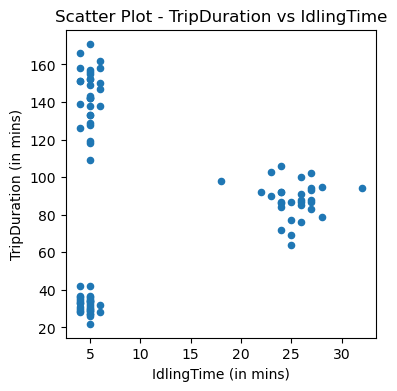

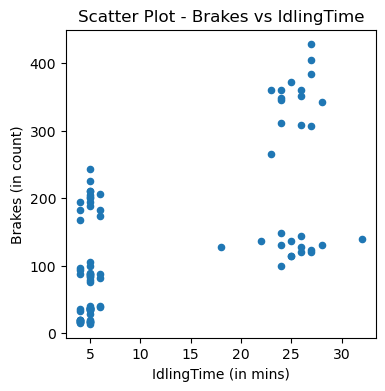

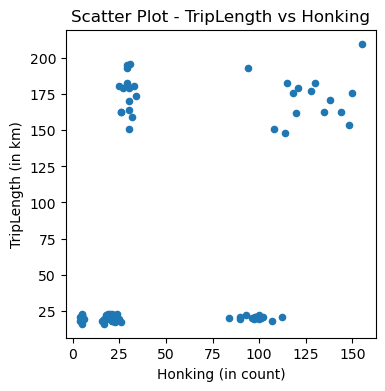

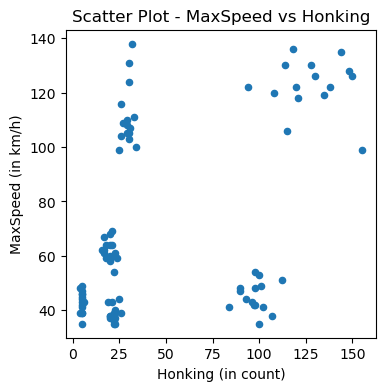

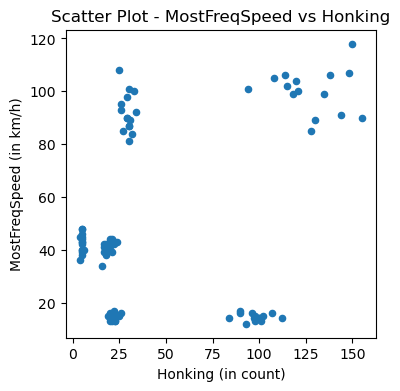

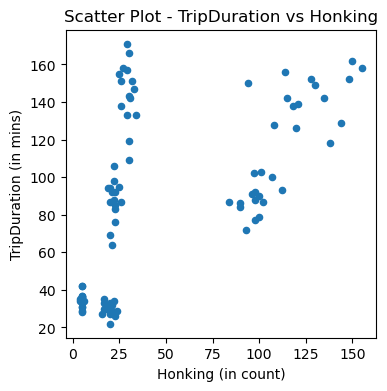

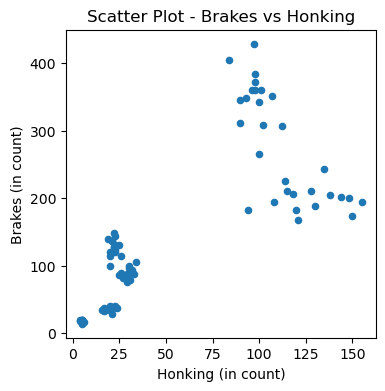

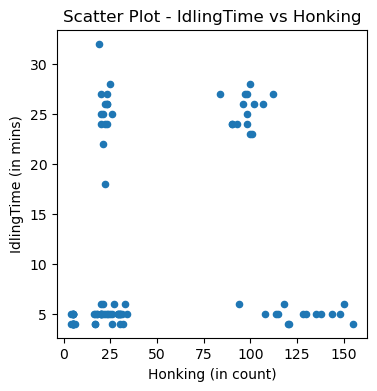

In [8]:
for i in range(len(trip.columns)):
  for j in range(i):
    trip.plot(x = trip.columns[i], y = trip.columns[j], kind = "scatter", figsize = (4,4))
    plt.xlabel(f"{trip.columns[i]} (in {units[i]})")
    plt.ylabel(f"{trip.columns[j]} (in {units[j]})")
    plt.title(f"Scatter Plot - {trip.columns[j]} vs {trip.columns[i]}")
    plt.show()

In [9]:
trip.corr()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
TripLength,1.000000,0.933549,0.922928,0.842934,0.047158,-0.471204,0.429318
MaxSpeed,0.933549,1.000000,0.928592,0.730388,0.011993,-0.564379,0.458151
MostFreqSpeed,0.922928,0.928592,1.000000,0.632675,-0.182159,-0.726001,0.309691
TripDuration,0.842934,0.730388,0.632675,1.000000,0.416028,0.018913,0.571365
Brakes,0.047158,0.011993,-0.182159,0.416028,1.000000,0.641201,0.778774
IdlingTime,-0.471204,-0.564379,-0.726001,0.018913,0.641201,1.000000,0.160450
Honking,0.429318,0.458151,0.309691,0.571365,0.778774,0.160450,1.000000


<Axes: >

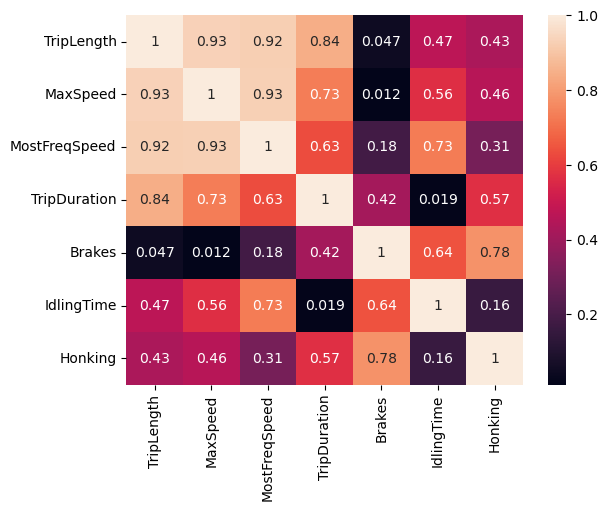

In [10]:
sns.heatmap(np.abs(trip.corr()),annot= True)

In [11]:
#### Standardising the data

In [12]:
trip_data = trip.copy()
scaler = StandardScaler()

for col_name in trip_data.columns:
  trip_data[col_name] = scaler.fit_transform(np.array(trip_data[col_name]).reshape(-1, 1))
trip_data.head()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
0,-0.682722,-0.564191,-1.072832,0.120059,1.503250,1.581327,1.346117
1,1.059432,1.737721,1.620347,1.464388,0.793511,-0.676745,1.389487
2,-0.723875,-0.942987,-1.014285,0.269429,1.888788,1.478688,1.237694
3,-0.669004,-0.797296,-0.077527,-1.096239,-1.037794,-0.779385,-0.974142
4,1.539554,1.096682,1.151968,1.784466,-0.415676,-0.676745,-0.453710


In [13]:
trip_data.describe()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,-6.832142e-17,1.409129e-16,-4.392091e-17,-1.244426e-16,4.392091e-17,1.000421e-16,7.564157e-17
std,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00
min,-7.513106e-01,-1.030401e+00,-1.131380e+00,-1.394979e+00,-1.064080e+00,-7.793847e-01,-9.958266e-01
25%,-6.964396e-01,-8.264343e-01,-1.028922e+00,-1.128247e+00,-8.669302e-01,-6.767450e-01,-6.488720e-01
50%,-6.827218e-01,-4.767767e-01,-2.531691e-01,1.336591e-02,-3.105292e-01,-6.767450e-01,-5.404486e-01
75%,1.265199e+00,1.023837e+00,1.122694e+00,9.736010e-01,5.481684e-01,1.273409e+00,1.031690e+00
max,1.909933e+00,1.970826e+00,1.971631e+00,1.784466e+00,2.572241e+00,2.094526e+00,2.278558e+00


#### Determining the optimal number of clusters using an elbow plot

In [14]:
wcss = []
k = list(range(1, 11))
for i in k:
  kmeans_cluster = KMeans(n_clusters = i)
  kmeans_cluster.fit(trip_data)
  wcss.append(kmeans_cluster.inertia_)

In [15]:
wcss

[637.0,
 282.4345645379583,
 112.68210031178532,
 63.69272394639253,
 21.152460105493695,
 19.811900934899953,
 16.693300490262068,
 15.404962655199865,
 14.54670308394044,
 12.402709527731817]

Text(0.5, 1.0, 'Elbow Plot')

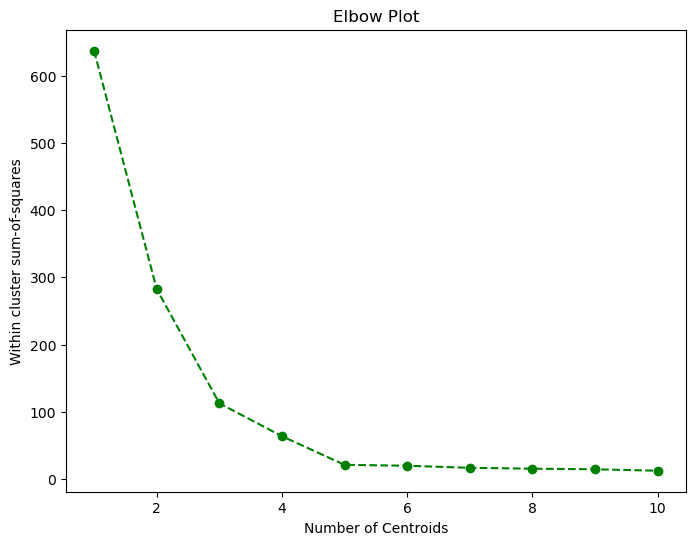

In [16]:
plt.figure(figsize = (8,6))
plt.plot(k, wcss, 'go--')
plt.xlabel('Number of Centroids')
plt.ylabel('Within cluster sum-of-squares')
plt.title('Elbow Plot')

#### Fitting the optimal clusters on data

In [17]:
kmeans_optimal = KMeans(n_clusters = 3)
kmeans_optimal.fit(trip_data)

KMeans(n_clusters=3)

In [18]:
y_pred = kmeans_optimal.predict(trip_data)
print(y_pred)

[0 1 0 2 1 0 0 0 1 1 1 2 0 2 0 1 2 2 0 0 1 0 0 0 0 0 2 0 1 1 2 0 2 1 2 1 1
 1 2 0 1 2 2 0 1 0 0 2 1 2 0 2 0 2 0 1 0 2 1 2 2 2 1 1 0 2 2 2 1 0 0 0 2 2
 2 1 1 1 2 2 1 1 1 1 2 2 0 1 0 1 2]


In [19]:
trip['Cluster'] = y_pred + 1
trip.head()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking,Cluster
0,21,51,14,93,307,27,112,1
1,148,130,106,156,226,5,114,2
2,18,38,16,100,351,26,107,1
3,22,43,48,36,17,4,5,3
4,183,108,90,171,88,5,29,2


#### Creating a dataframe of centroids for the clusters

In [20]:
kmeans_optimal.cluster_centers_

array([[-0.6941533 , -0.82934812, -1.05819537,  0.01407719,  0.90654317,
         1.4102614 ,  0.21562343],
       [ 1.41609384,  1.35795442,  1.32956133,  1.20405736,  0.07384016,
        -0.68016633,  0.62257236],
       [-0.69865213, -0.51155448, -0.26261222, -1.17883989, -0.94875807,
        -0.70654362, -0.81115722]])

In [21]:
centroids_data = pd.DataFrame(kmeans_optimal.cluster_centers_, columns = trip_data.columns, 
                              index = range(1, max(trip['Cluster']) + 1))
centroids_data

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
1,-0.694153,-0.829348,-1.058195,0.014077,0.906543,1.410261,0.215623
2,1.416094,1.357954,1.329561,1.204057,0.073840,-0.680166,0.622572
3,-0.698652,-0.511554,-0.262612,-1.178840,-0.948758,-0.706544,-0.811157


#### Plotting the scatterplot labeled with clusters

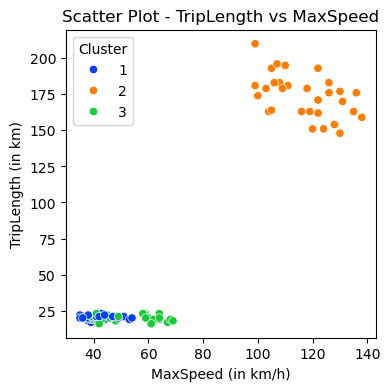

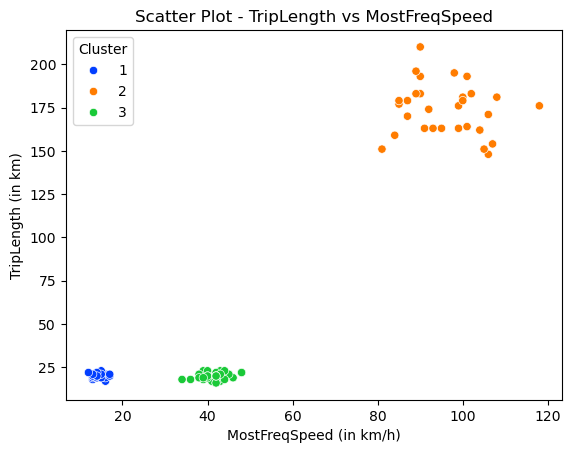

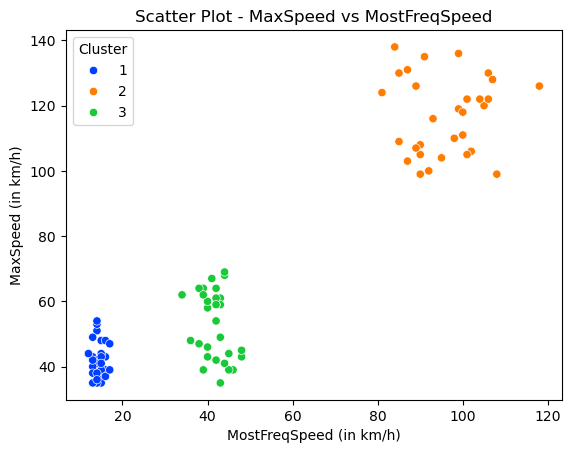

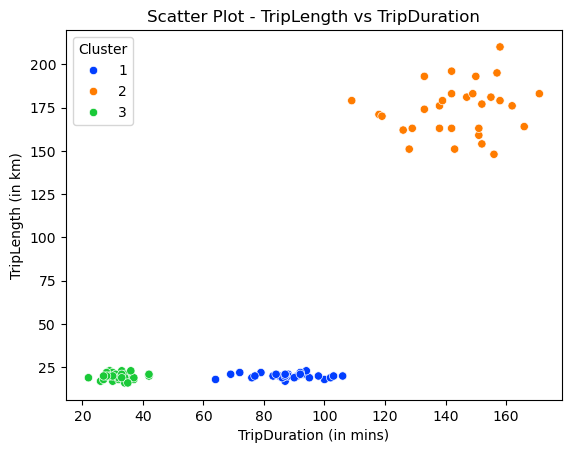

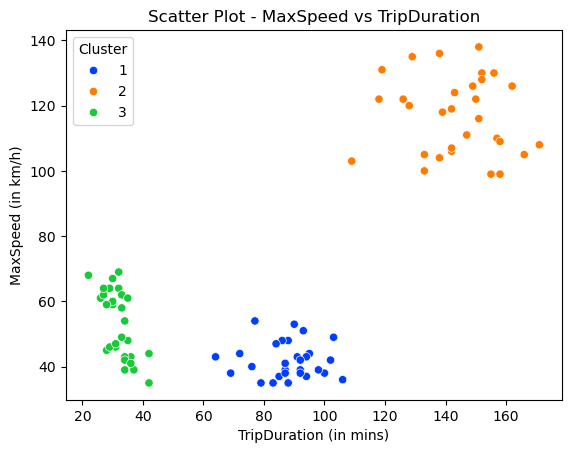

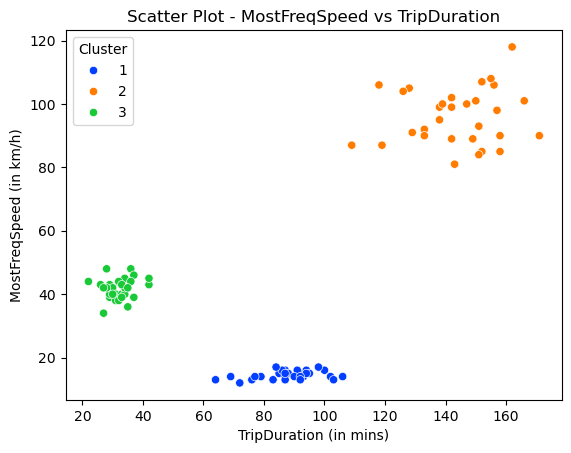

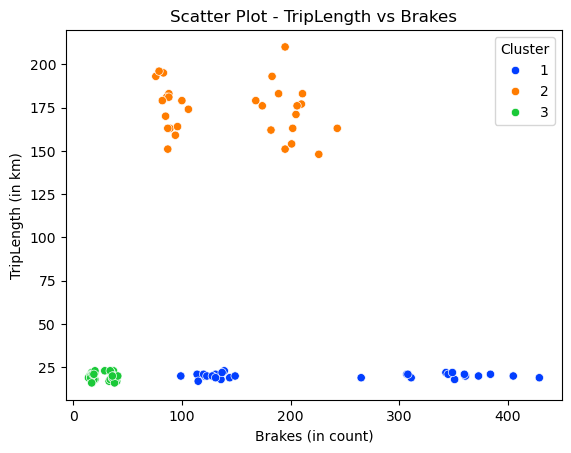

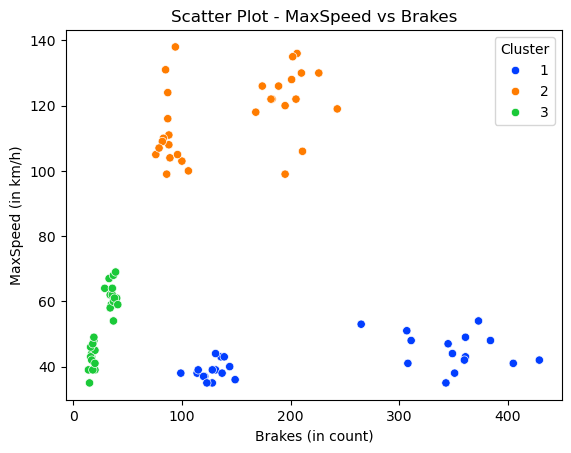

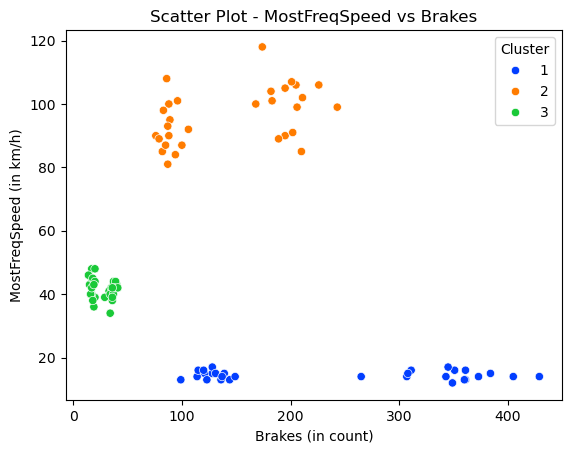

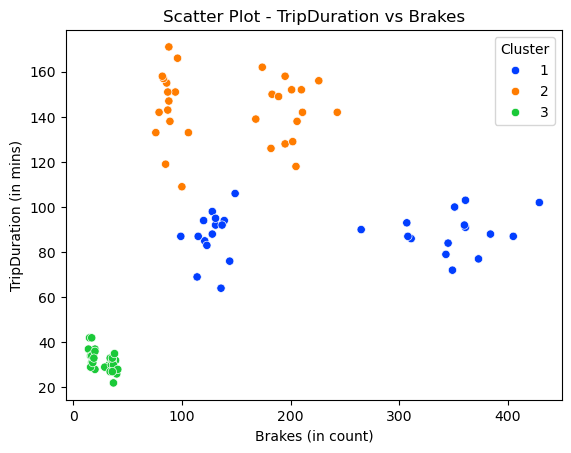

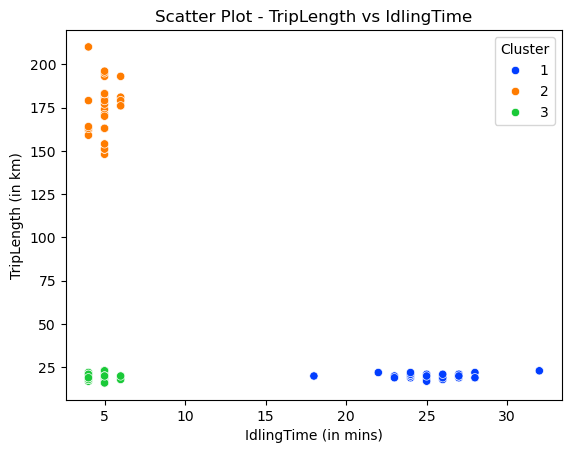

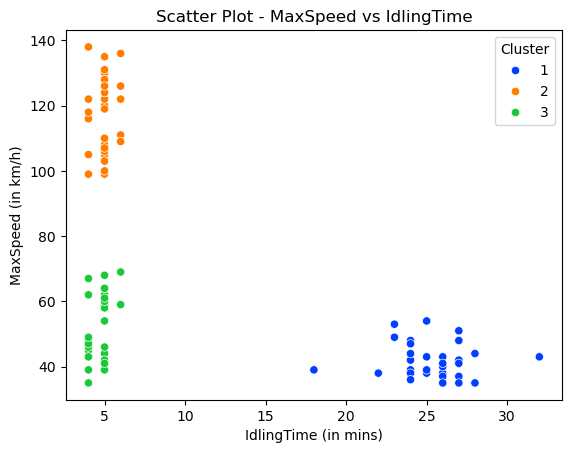

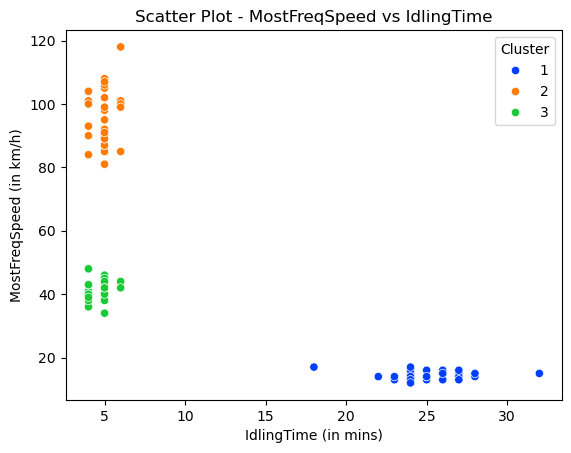

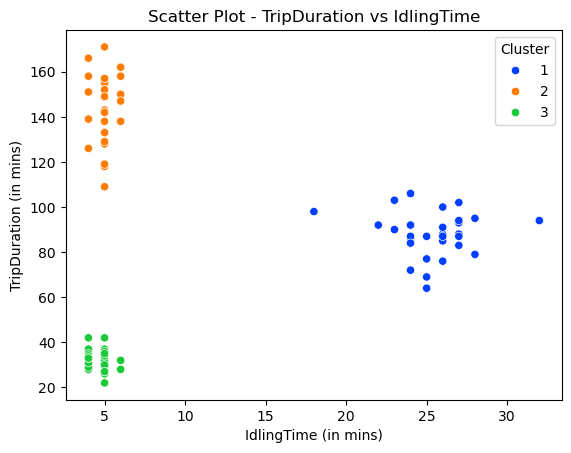

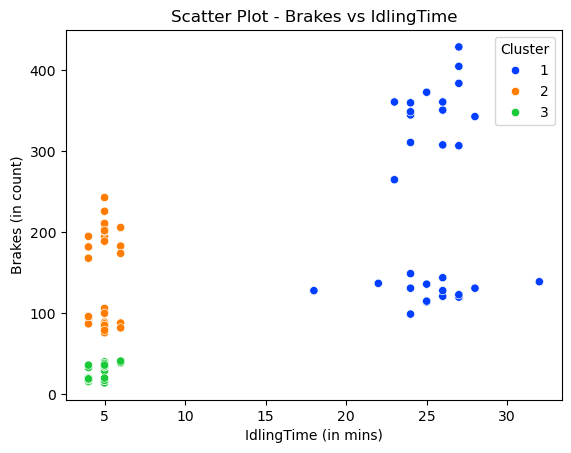

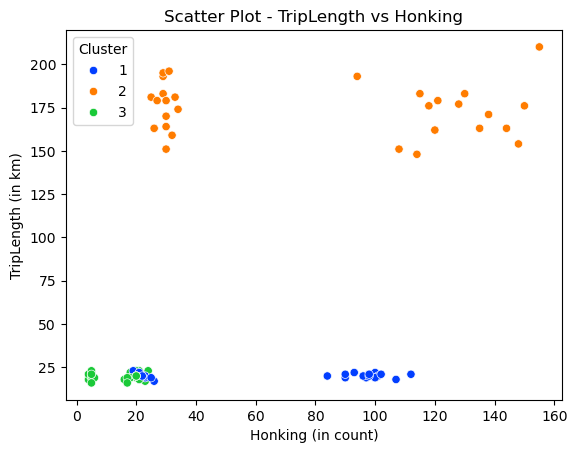

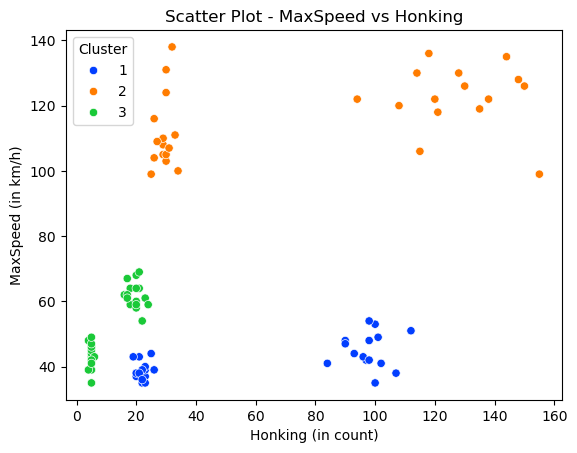

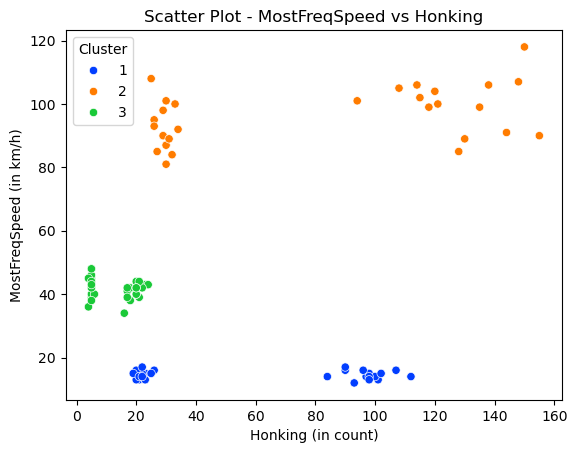

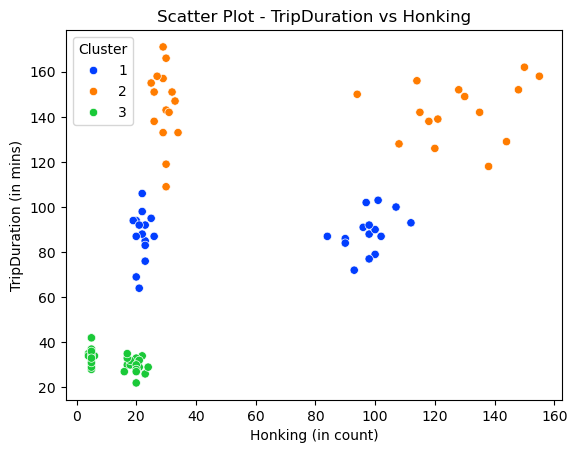

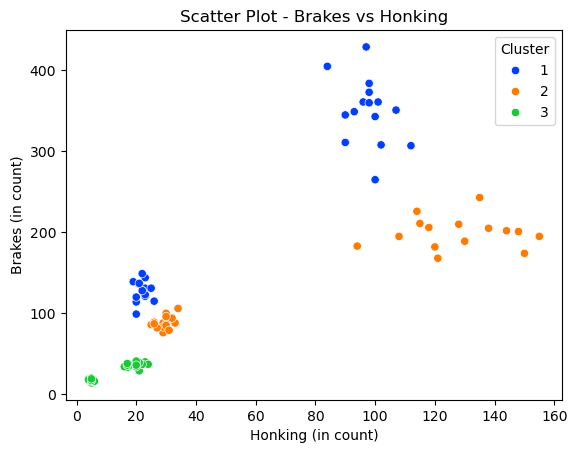

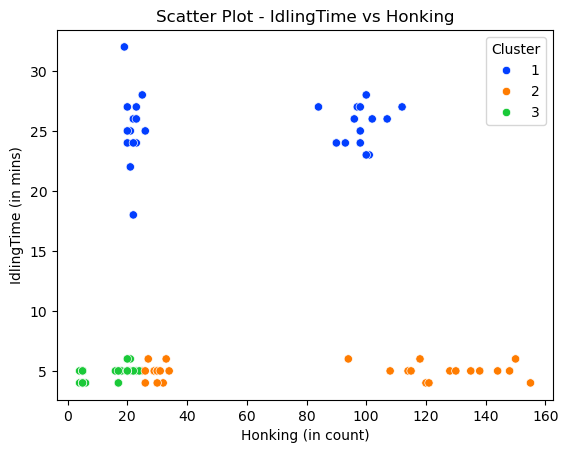

In [22]:
fig1 = plt.figure(figsize = (4,4))
for i in range(len(trip_data.columns)):
  for j in range(i):
    fig1 = sns.scatterplot(x = trip[trip.columns[i]], y = trip[trip.columns[j]], hue = trip["Cluster"], palette = "bright")
    plt.xlabel(f"{trip.columns[i]} (in {units[i]})")
    plt.ylabel(f"{trip.columns[j]} (in {units[j]})")
    plt.title(f"Scatter Plot - {trip.columns[j]} vs {trip.columns[i]}")
    plt.show()

### Hierarchical Clustering

  - An algorithm which involves clustering over clustering
  - Uses agglomerative/divisive techniques
  - Agglomerative: bottom-up approach; initially individual data points close to one another are initially clustered, followed by small clusters closer to one another combining to become a big cluster
  - Divisive: top-down approach; all data points are encapsulated within a big cluster, and the cluster gets divided to smaller clusters

#### Importing the required packages

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

#### Clustering over a sample data, and an illustration of the dendogram

(30, 2) (30,)


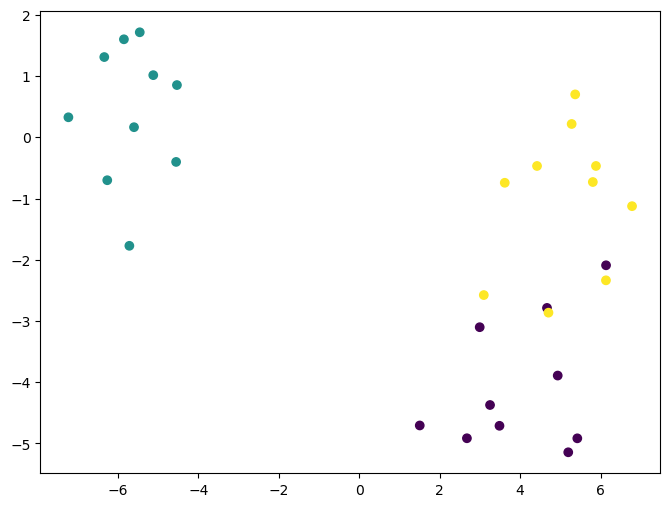

In [24]:
X, y = make_blobs(n_samples = 30, n_features = 2, centers = 3, random_state = 123)
print(X.shape, y.shape)
plt.figure(figsize = (8,6))
plt.scatter(X[:, 0], X[:, 1], c = y)

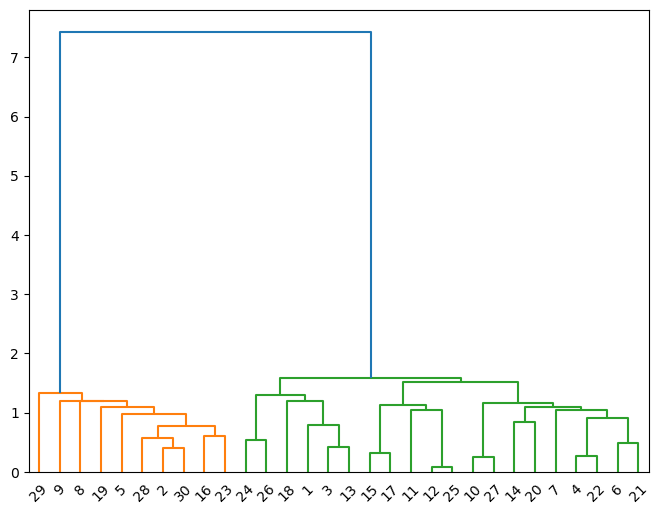

In [25]:
cluster = linkage(X, method = 'single')
plt.figure(figsize = (8,6))
dendrogram(cluster, labels = list(range(1, X.shape[0] + 1)))
plt.show()

From the dendogram, it can be seen that the given data points can be grouped into 2 clusters. Hence, defining an agglomerative clustering model with 2 clusters

In [26]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

#### Scatter Plot visualized with clusters

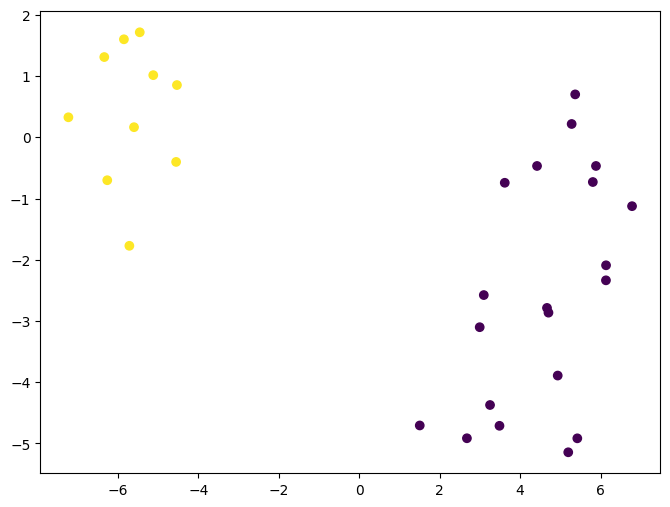

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(X[:, 0],X[:, 1], c = cluster.labels_)

Now, we will try the same exercise over our trip details dataset

#### Reading the data and obtaining information on the data

In [ ]:
trip = pd.read_excel('tripDetails.xlsx')
trip.head()

,TripID,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
0,1,21,51,14,93,307,27,112
1,2,148,130,106,156,226,5,114
2,3,18,38,16,100,351,26,107
3,4,22,43,48,36,17,4,5
4,5,183,108,90,171,88,5,29


In [ ]:
units = ["km", *["km/h"] * 2, *("mins", "count") * 2]
print(units)

['km', 'km/h', 'km/h', 'mins', 'count', 'mins', 'count']


#### Dropping the column **TripID** and viewing summary statistics

In [ ]:
trip.drop(labels = 'TripID', axis = 1, inplace = True)
trip.tail()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
86,21,42,13,92,360,24,98
87,183,126,89,149,189,5,130
88,22,44,12,72,349,24,93
89,163,135,91,129,202,5,144
90,20,64,42,27,36,5,20


In [ ]:
trip.describe()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,70.769231,70.362637,50.648352,87.373626,135.439560,11.593407,49.923077
std,73.302126,34.509424,34.349632,47.123160,114.758607,9.796800,46.371023
min,16.000000,35.000000,12.000000,22.000000,14.000000,4.000000,4.000000
25%,20.000000,42.000000,15.500000,34.500000,36.500000,5.000000,20.000000
50%,21.000000,54.000000,42.000000,88.000000,100.000000,5.000000,25.000000
75%,163.000000,105.500000,89.000000,133.000000,198.000000,24.000000,97.500000
max,210.000000,138.000000,118.000000,171.000000,429.000000,32.000000,155.000000


#### Standardising the data

In [ ]:
trip_data = trip.copy()
scaler = StandardScaler()

for col_name in trip_data.columns:
  trip_data[col_name] = scaler.fit_transform(np.array(trip_data[col_name]).reshape(-1, 1))
trip_data.head()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking
0,-0.682722,-0.564191,-1.072832,0.120059,1.503250,1.581327,1.346117
1,1.059432,1.737721,1.620347,1.464388,0.793511,-0.676745,1.389487
2,-0.723875,-0.942987,-1.014285,0.269429,1.888788,1.478688,1.237694
3,-0.669004,-0.797296,-0.077527,-1.096239,-1.037794,-0.779385,-0.974142
4,1.539554,1.096682,1.151968,1.784466,-0.415676,-0.676745,-0.453710


#### Plotting the dendrogram

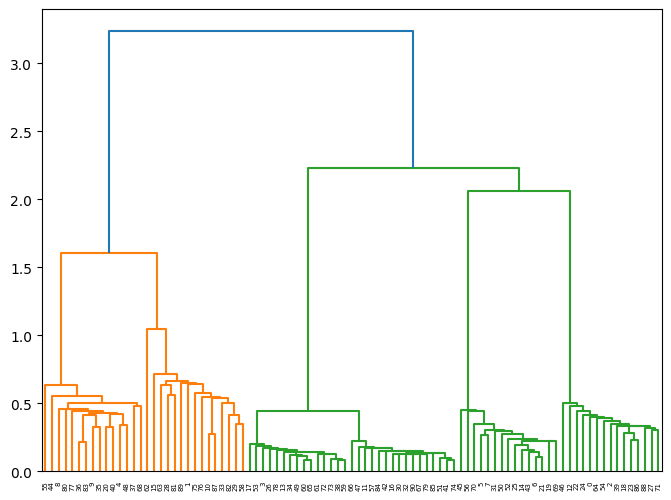

In [ ]:
cluster = linkage(trip_data, method = 'single')
plt.figure(figsize = (8,6))
dendrogram(cluster)
plt.show()

From the dendogram, it can be seen that the given data points can be grouped into 2 clusters. Hence, defining an agglomerative clustering model with 2 clusters

In [ ]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(trip_data)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [ ]:
trip['Cluster'] = cluster.labels_ + 1

In [ ]:
trip.head()

,TripLength,MaxSpeed,MostFreqSpeed,TripDuration,Brakes,IdlingTime,Honking,Cluster
0,21,51,14,93,307,27,112,1
1,148,130,106,156,226,5,114,2
2,18,38,16,100,351,26,107,1
3,22,43,48,36,17,4,5,1
4,183,108,90,171,88,5,29,2


#### Scatter Plots visualized with clusters

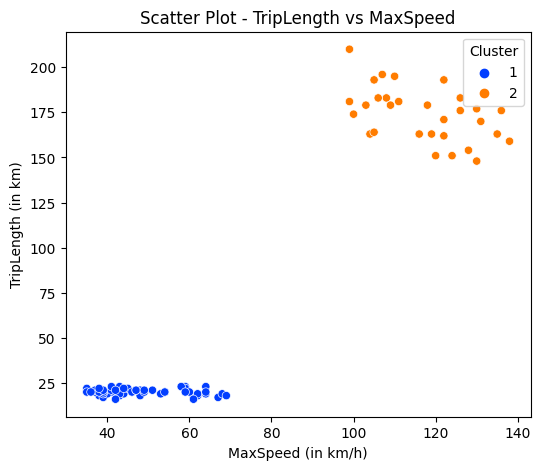

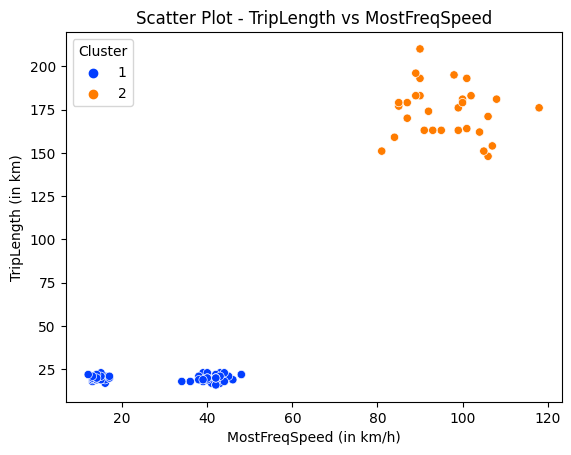

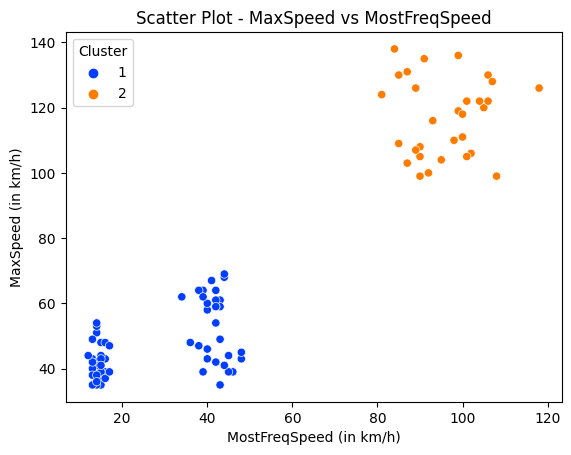

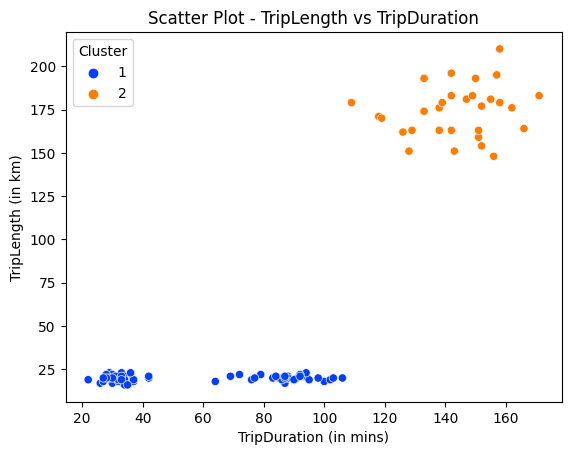

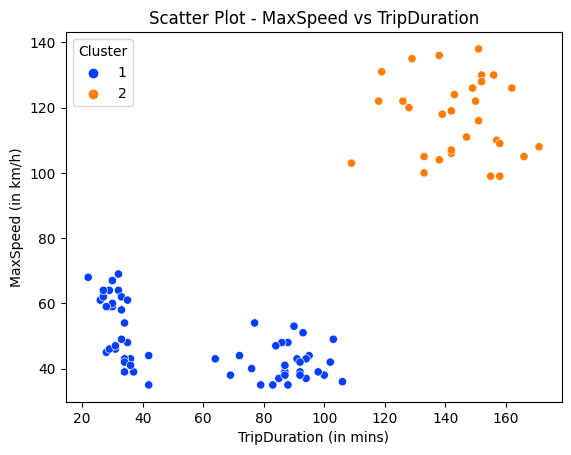

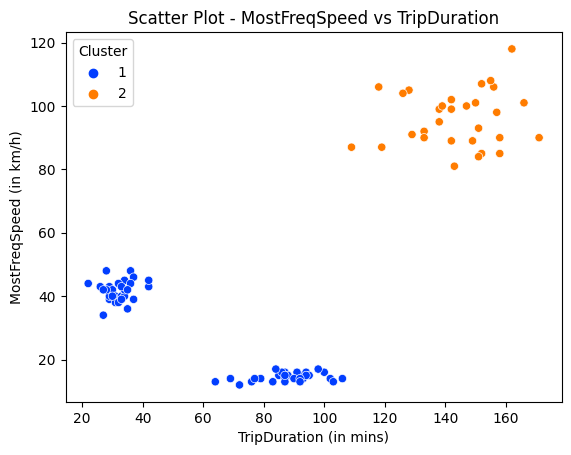

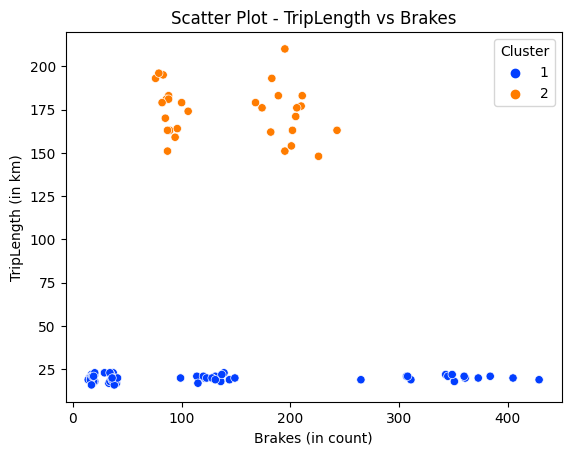

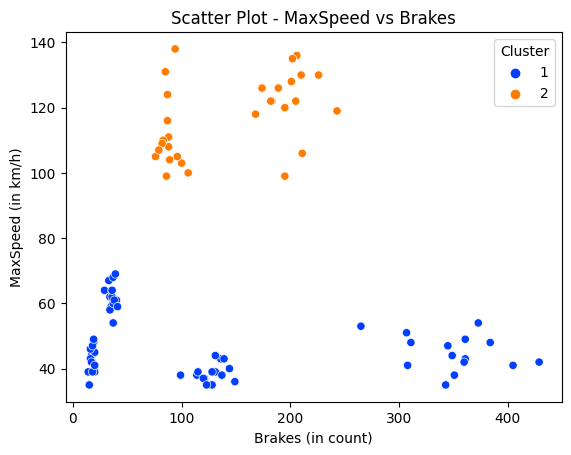

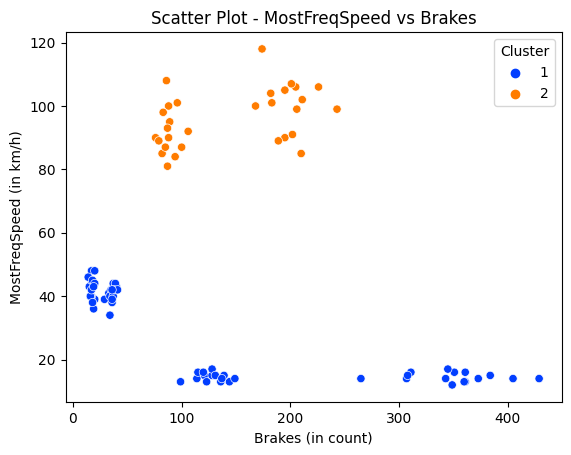

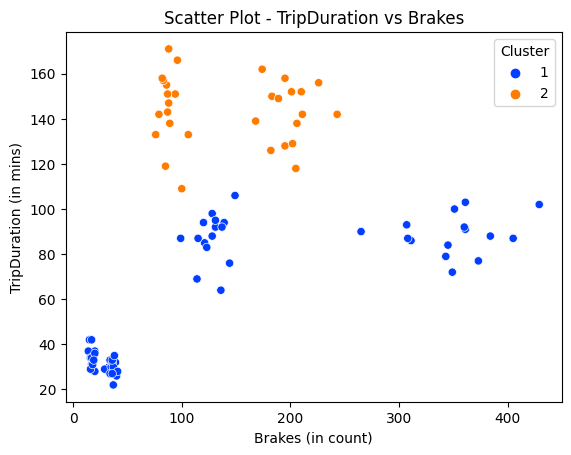

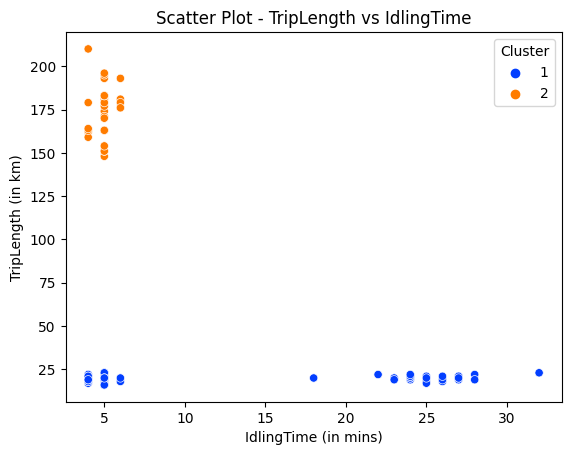

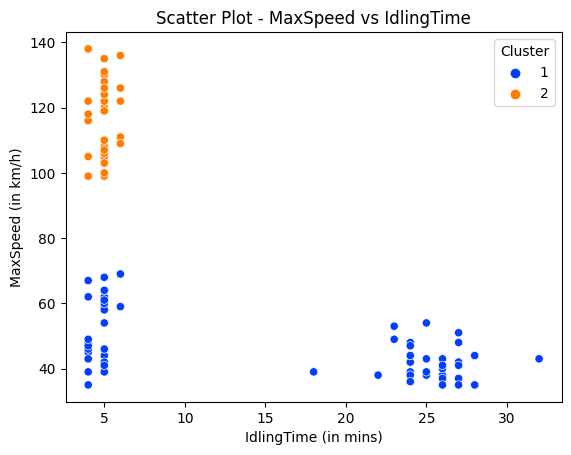

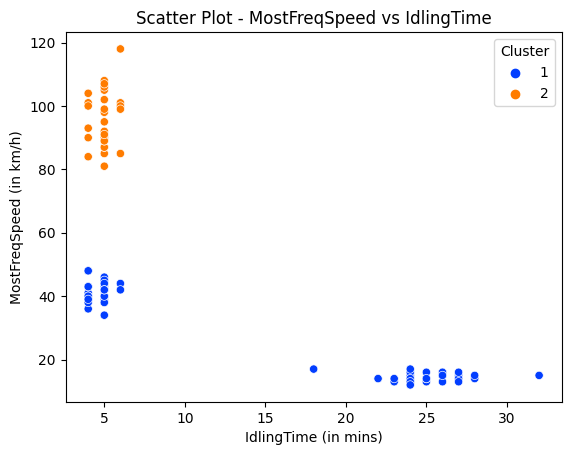

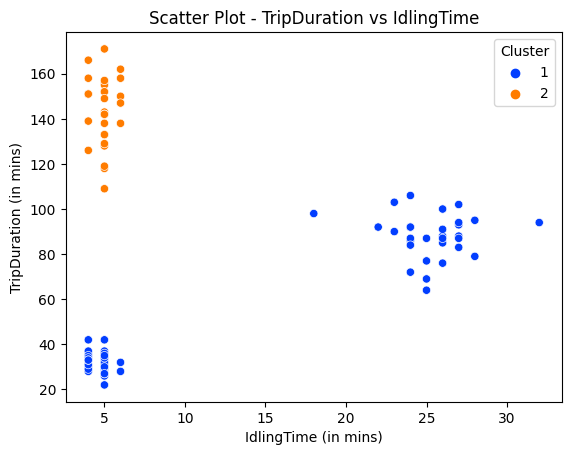

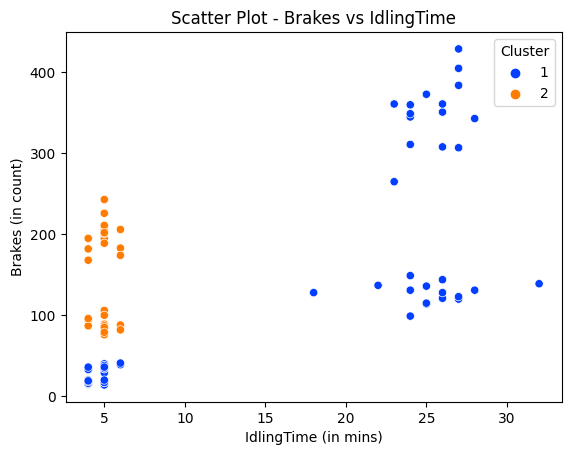

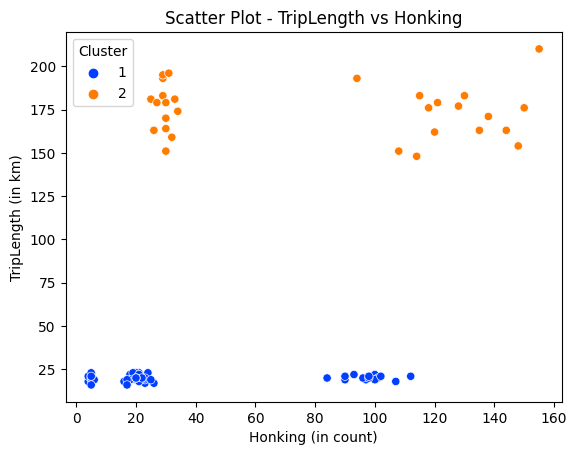

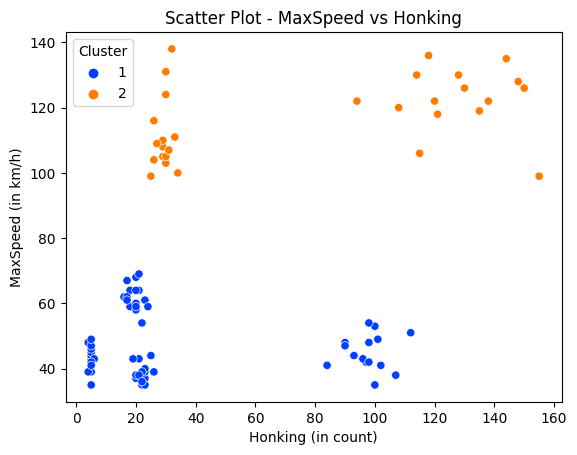

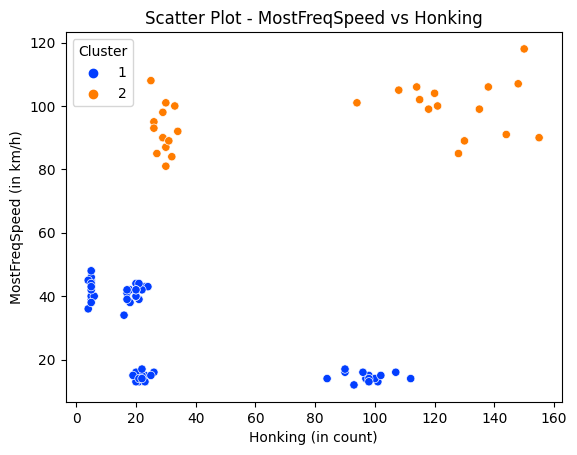

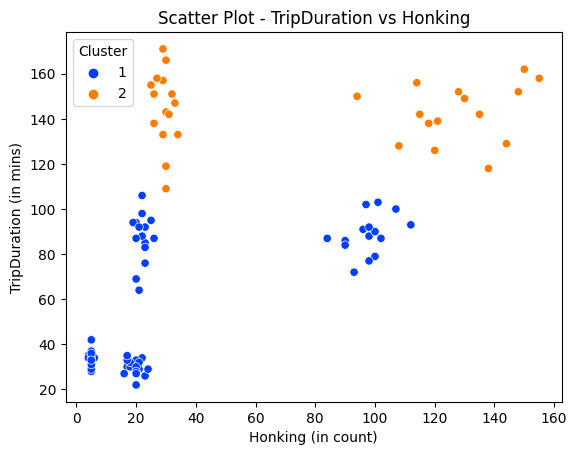

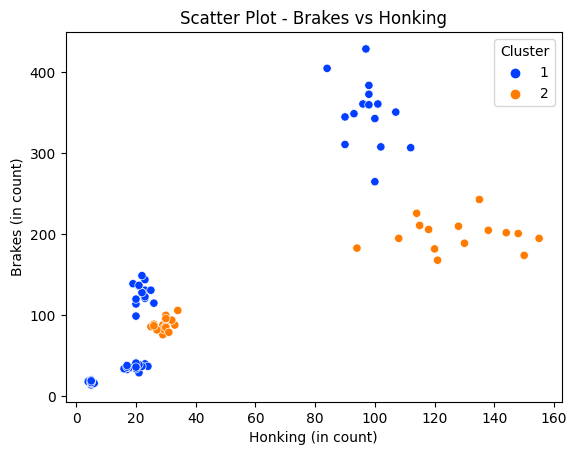

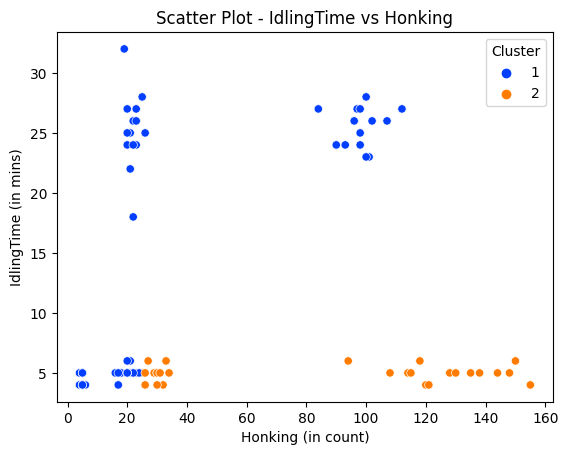

In [ ]:
fig2 =plt.figure(figsize = (6,5))
for i in range(len(trip_data.columns)):
  for j in range(i):
    fig2 =sns.scatterplot(x = trip[trip.columns[i]], y = trip[trip.columns[j]], hue = trip["Cluster"], palette = "bright")
    plt.xlabel(f"{trip.columns[i]} (in {units[i]})")
    plt.ylabel(f"{trip.columns[j]} (in {units[j]})")
    plt.title(f"Scatter Plot - {trip.columns[j]} vs {trip.columns[i]}")
    plt.show()